In [1]:
from model import Model
from plot_settings import *
import numpy as np

pygame 2.5.2 (SDL 2.28.3, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
plot_settings()


### Модель, когда только зеленый сигнал светофора

In [3]:
model = Model([[10] for _ in range(22)])


1 симуляция в `__main__`

In [4]:
%%time
r = model.simulate_one()

CPU times: total: 12.9 s
Wall time: 19.1 s


1 симуляция в `Process`

In [5]:
%%time
r = model.simulate(n_eval=1)

CPU times: total: 46.9 ms
Wall time: 21.8 s


5 параллельных `Process`

In [6]:
%%time
res = model.simulate(n_eval=5)

CPU times: total: 15.6 ms
Wall time: 32.7 s


5 последовательных цикла в `__main__`

In [7]:
%%time
r = model.simulate_one()
r = model.simulate_one()
r = model.simulate_one()
r = model.simulate_one()
r = model.simulate_one()


CPU times: total: 1min 12s
Wall time: 1min 31s


In [8]:
res = model.simulate(n_eval=5)

Text(0, 0.5, 'mean v')

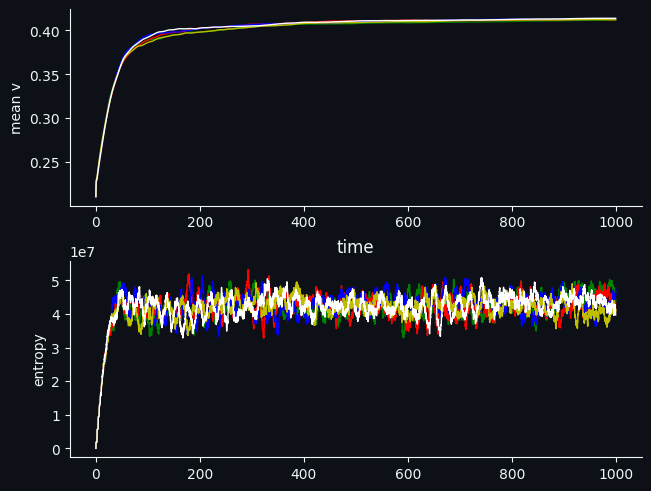

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained')

for t, v, e in res:
    ax1.plot(t, v, linewidth=1)
    ax2.plot(t, e, linewidth=1)
ax2.set_title("time")
ax2.set_ylabel("entropy")
ax1.set_ylabel("mean v")

# Модель с параметрами зеленый 5, красный 5

In [12]:
model = Model([[5, 5] for _ in range(22)])


In [13]:
res = model.simulate(n_eval=5)

Text(0, 0.5, 'mean v')

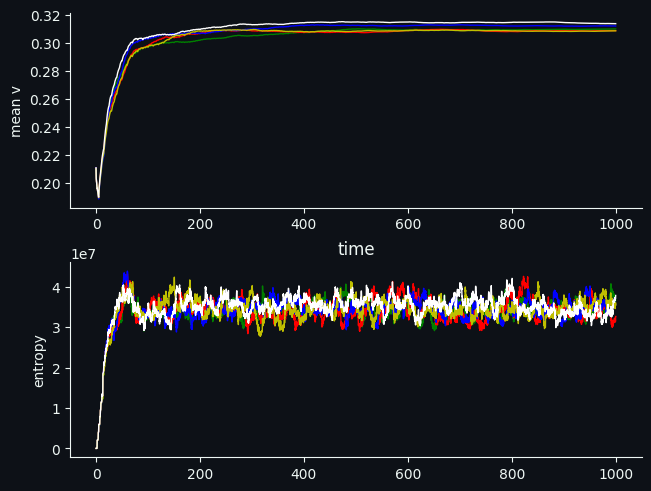

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained')

for t, v, e in res:
    ax1.plot(t, v, linewidth=1)
    ax2.plot(t, e, linewidth=1)
ax2.set_title("time")
ax2.set_ylabel("entropy")
ax1.set_ylabel("mean v")


# Модель с оптимальными параметрами 

In [15]:
best_params =  [ 7.675447134961057, 5.306722725032909, 9.672194056398018, 2.5424687666404533, 6.577404240604412, 7.588633806966979, 5.366467594598852, 4.694434096702121, 4.7776705306988365, 9.223291973657577,  7.1672629236121725,  8.402297655683864,  9.625685966321265,  5.468455928177309,  7.303268611787422,  4.549349878092204,  5.871253374241523,  3.6352711162557982,  5.348859810474501,  6.043749826463642,  5.7698757754962315,  7.336785235353177]
model = Model([[p, 10-p] for p in best_params])


In [16]:
res = model.simulate(n_eval=3, t_max=2000)

Text(0, 0.5, 'mean v')

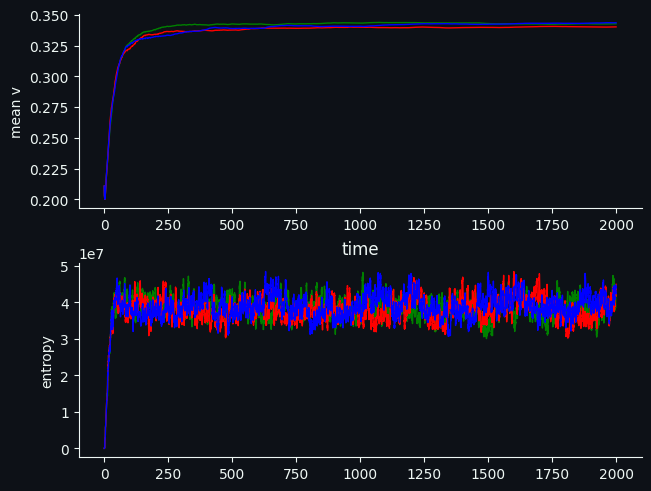

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained')

for t, v, e in res:
    ax1.plot(t, v, linewidth=1)
    ax2.plot(t, e, linewidth=1)
ax2.set_title("time")
ax2.set_ylabel("entropy")
ax1.set_ylabel("mean v")
